# NFL Passing Stats
By: Walter J. Herrera

This data was retrived from Kaggle. The reason I chose this dataset is to see how the passing game in the NFL has evolved from its inception to the modern day game. This dataset has passing statistics dating from 1924 up until 2016. Different philosphies on how offense should be played has defined many eras in the NFL, recently it seems to me and many other fans that there has been a drastic increase in the passing offense during the modern era. I am interested in seeing if there really has been upward trend in passing as the game has grown over the years.

Link to original data: https://www.kaggle.com/datasets/kendallgillies/nflstatistics

**1. Data Description**

The original data contains 8526 rows and 23 columns before uploading the data. Prior to uploading I did sort the original data by year (2016-1924). Moving forward I will remove features/stats I believe aren't directly related to the evolution of passing stats to give a general sense of the overall change in the game.

In [ ]:
#Import Libraries and Files
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline

Saving Career_Stats_Passing.csv to Career_Stats_Passing.csv


In [ ]:
#initializing Dataframe
df = pd.read_csv(io.BytesIO(uploaded['Career_Stats_Passing.csv']))

In [ ]:
#Data Types
print(df.dtypes)
print('===========')
print(df.info())

Player Id                          object
Name                               object
Position                           object
Year                                int64
Team                               object
Games Played                        int64
Passes Attempted                   object
Passes Completed                   object
Completion Percentage              object
Pass Attempts Per Game            float64
Passing Yards                      object
Passing Yards Per Attempt          object
Passing Yards Per Game             object
TD Passes                          object
Percentage of TDs per Attempts     object
Ints                               object
Int Rate                           object
Longest Pass                       object
Passes Longer than 20 Yards        object
Passes Longer than 40 Yards        object
Sacks                              object
Sacked Yards Lost                  object
Passer Rating                     float64
dtype: object
<class 'pandas.core.

In regards to the data types I believe these are appropriate in representing the passing statistics in the NFL.

**Features/Stats to be removed + Filters:**  'Player Id', 'Games Played', 'Pass Attempts Per Game', 'Passing Yards Per Game', 'Percentage of TDs per Attempts', 'Int Rate', 'Longest Pass', 'Passes Longer than 20 Yards', 'Passes Longer than 40 Yards', 'Sacks', 'Sacked Yards Lost'.

I chose to remove this data to focus more so on the bigger statistics that matter when it comes to NFL passing. I believed these stats to go more in depth and thus will lose sight of the big picture. Other stats can also be dependent of other players who are not passing. Such as sacks which is more so determined by how good a team's offensive line is.

Other data that I will chose to leave out is any player who has attempted less than 5 passes. This helps filter out trick plays, such as a wide receiver attempting only one pass, and ensures that backup players with limited playing time are still included."

To ensure smoother data processing, I replaced all '--' values from the original dataset with NaN (Not a Number). I then used the pd.to_numeric function with the errors='coerce' argument to convert any non-numeric values to NaN.I then filtered out these NaN values, which will help prevent value or type errors.

In [ ]:
columns_removed = ['Player Id', 'Games Played', 'Pass Attempts Per Game', 'Passing Yards Per Game', 'Percentage of TDs per Attempts', 'Int Rate', 'Longest Pass', 'Passes Longer than 20 Yards', 'Passes Longer than 40 Yards', 'Sacks', 'Sacked Yards Lost']
df = df.drop(columns_removed, axis=1)

#Replace '--' with NaN
df = df.replace('--', np.nan)

#Convert 'Passes Attempted' to numeric, coerce errors to NaN
df['Passes Attempted'] = pd.to_numeric(df['Passes Attempted'], errors='coerce')

#Filter out NaN values and apply the condition
filtered_df = df[(df['Passes Attempted'].notna()) & (df['Passes Attempted'] >= 5)]

In [ ]:
#Printing a few rows of the dataframe
filtered_df.head()

,Name,Position,Year,Team,Passes Attempted,Passes Completed,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Passer Rating
0,"Savage, Tom",QB,2016,Houston Texans,73.0,46,63,461,6.3,0,0,80.9
1,"Cook, Connor",QB,2016,Oakland Raiders,21.0,14,66.7,150,7.1,1,1,83.4
13,"Brees, Drew",QB,2016,New Orleans Saints,673.0,471,70,"5,208",7.7,37,15,101.7
14,"Rivers, Philip",QB,2016,San Diego Chargers,578.0,349,60.4,"4,386",7.6,33,21,87.9
22,"McGloin, Matt",QB,2016,Oakland Raiders,15.0,8,53.3,50,3.3,0,0,60.4


The attributes collected that will help categorize the data is "Name", "Position", and "Team". We need to know from who, what position they played, where they played, to better understand the actual passing stats. A wide receiver may only attempt 2 passes in a season whilst a veteran quarterback may attempt 500 passes in a season.

The other stats are key to discovering how the passing game has evolved. It is important though to distinguish that "Year" represents the NFL season a player played in and it and all other stats are for that given season. For example Tom Savage in 2016 only attempted 73 passes while Drew Brees in that year attempted 673.

"Passes Attempted" and "Passes Completed" are both directly related "Completion Percentage" which is found by dividing the number of completed passes by the number of attempted passes. "Passing Yards" is how many yards a player threw for in a given season and it is related to "Passing Yards Per Attempt". This is found by dividing passing yards by passing attempts and can really show how efficient a player is per pass attempt. For "TD Passes" it is simply the amount of touchdowns thrown in a season and same goes for "Ints" which is the amount of interceptions thrown to the defense. Finally there is "Passer Rating" also known as Quarterback Rating, this is a unique statistic as it doesn't solely account for the traditional box score stats, this rating takes more into account of "situational" football. For example if a quarterback plays against a top 5 defense they are given more leeway in this rating. It analyzes all the different situations a quarterback is in such as down and distance, injuries to their teammates, etc. to determine how good they played overall. It is a newer statistic but I think it'll be interesting to see if on average if passer rating has increased.

**2. Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Passes Attempted', 'Passes Completed', 'Completion Percentage', 'Passing Yards',
                     'Passing Yards Per Attempt', 'TD Passes', 'Ints', 'Passer Rating']

for column in features_to_scale:
    filtered_df.loc[:, column] = pd.to_numeric(filtered_df[column], errors='coerce')

#Creating scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df[features_to_scale])

#Creating new scaled df
scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale, index=filtered_df.index)
final_df = pd.concat([filtered_df[['Year', 'Name', 'Team', 'Position']], scaled_df], axis=1)


For this data I chose not to imputate any data rather I replaced all empty values with NaN to truly represent missing values when I scaled the data. I chose to use NaN for missing values instead of imputing them in order to preserve the integrity of the original data and accurately reflect the real stats for each season. For example, Phil Dawson did not attempt any passes in 2016, and it would be misleading to impute data based on other players' performance since Dawson never threw a pass that year

**3. Data Visualization**



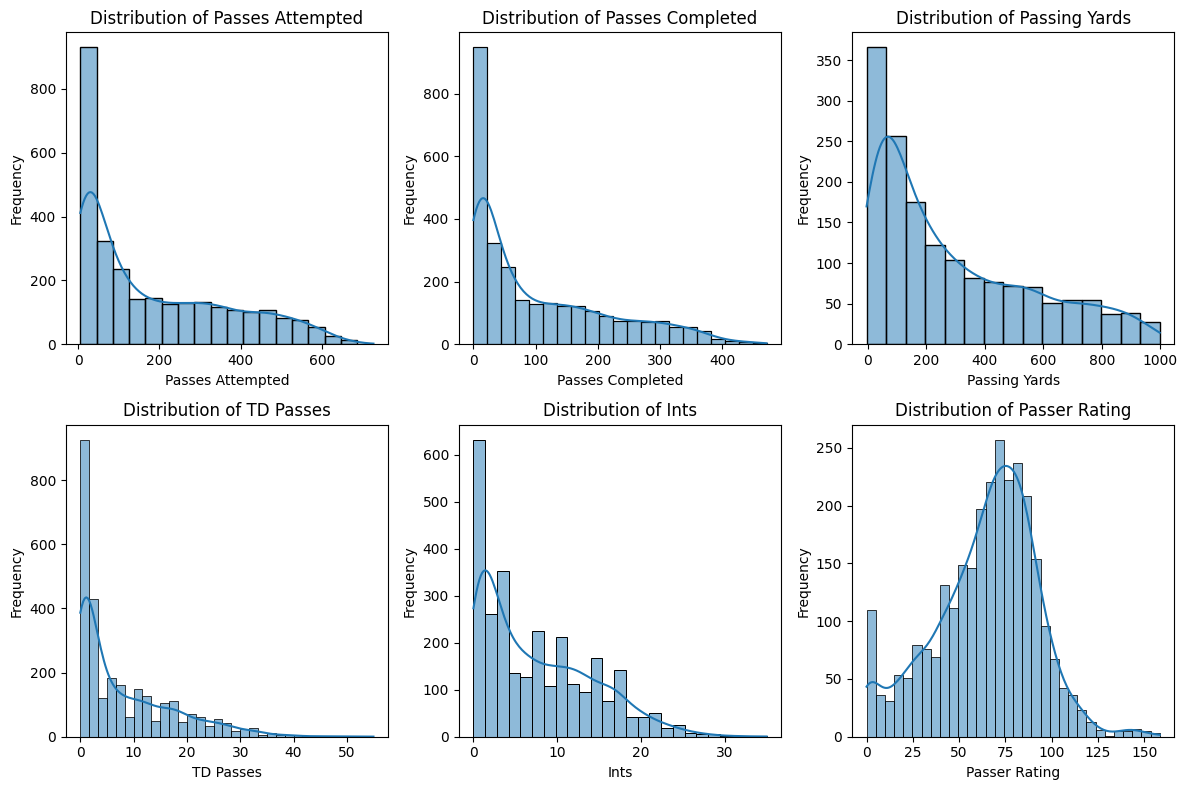

In [ ]:
features = ['Passes Attempted', 'Passes Completed', 'Passing Yards', 'TD Passes', 'Ints', 'Passer Rating']

#Creating histograms with seaborn with filtered df not scaled df
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
      plt.subplot(2, 3, i + 1)
      sns.histplot(filtered_df[feature], kde=True)
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms offer insights into the distribution and tendencies of key passing stats in the NFL, revealing typical ranges, skewness, and potential outliers for each statistic.

For example, the histogram of passing yards is skewed to the right, it suggests that most quarterbacks tend to throw for a moderate number of yards, while few outliers have exceptionally high totals. This kind of analysis helps identify common patterns and standout performances.

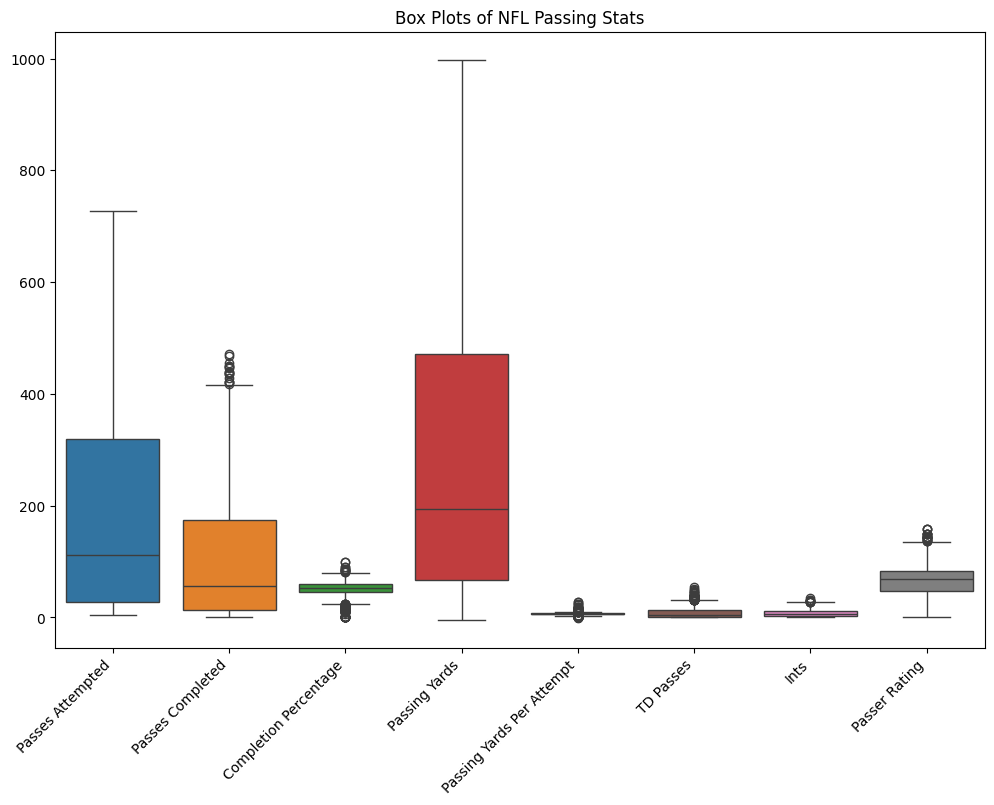

In [ ]:
features_to_visualize = ['Passes Attempted', 'Passes Completed', 'Completion Percentage', 'Passing Yards',
                          'Passing Yards Per Attempt', 'TD Passes', 'Ints', 'Passer Rating']

#Creating box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df[features_to_visualize])
plt.title('Box Plots of NFL Passing Stats')
plt.xticks(rotation=45, ha='right')
plt.show()

The box plots visualize the distribution of eight passing stats: Passes Attempted, Passes Completed, Completion Percentage, Passing Yards, Passing Yards Per Attempt, TD Passes, Ints, and Passer Rating.

Each plot provides a visual summary for the median value of the stat, outliers, and interquartile range.

Passing yards has a wider IQR (box) than other stats demonstrating higher variability compared to other stats.

<ipython-input-95-35f09b6ae018>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Decade'] = filtered_df['Year'] // 10 * 10


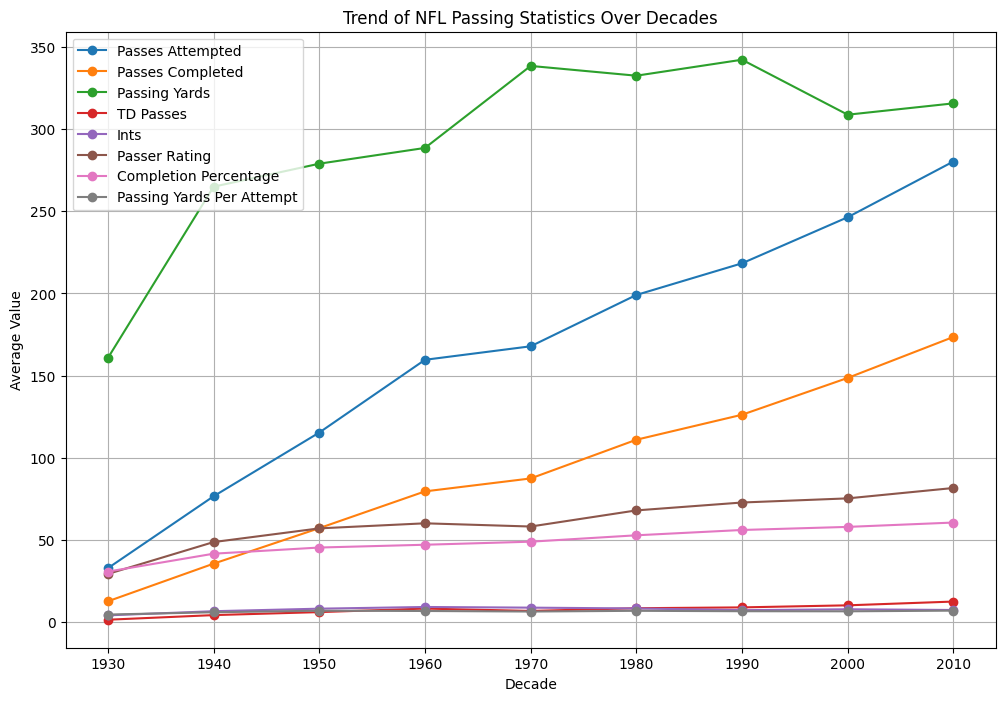

In [ ]:
#To visualize the change in passing over the years group data by decade and calculate the average stats for each decade
filtered_df.loc[:, 'Decade'] = filtered_df['Year'] // 10 * 10

#Creating a new 'Decade' column
decade_stats = filtered_df.groupby('Decade')[['Passes Attempted', 'Passes Completed', 'Passing Yards', 'TD Passes', 'Ints', 'Passer Rating', 'Completion Percentage', 'Passing Yards Per Attempt']].mean()

plt.figure(figsize=(12, 8))
for stat in ['Passes Attempted', 'Passes Completed', 'Passing Yards', 'TD Passes', 'Ints', 'Passer Rating', 'Completion Percentage', 'Passing Yards Per Attempt']:
    plt.plot(decade_stats.index, decade_stats[stat], marker='o', label=stat)

#Visualization
plt.title('Trend of NFL Passing Statistics Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

The line plot displays the average values of various passing stats across different decades. By analyzing the line plot we can infer how the passing game in the NFL has changed. By looking at the plot many of the stats have an upward trend across the decades, with the exception of touchdowns and interception which have remained relatively stable.

These trends highlight a significant evolution in the NFL: the passing game has become increasingly prominent. Teams are relying more on passing to move the ball and score, while quarterbacks are becoming more accurate and efficient.

This can be due to many factors such as rule changes and penalties favoring quarterbacks, such as the roughing the passer penalty. Other factors inlude offensive innovaton and the rise of new schemes such as the shotgun formation. It can also simply be that athletes and quarterbacks have been better developed over the years.

**4. Logistic Regression Classifier**

Accuracy: 0.8789473684210526
R-squared: 0.43103074141048825
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       395
           1       0.87      0.71      0.78       175

    accuracy                           0.88       570
   macro avg       0.88      0.83      0.85       570
weighted avg       0.88      0.88      0.88       570



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


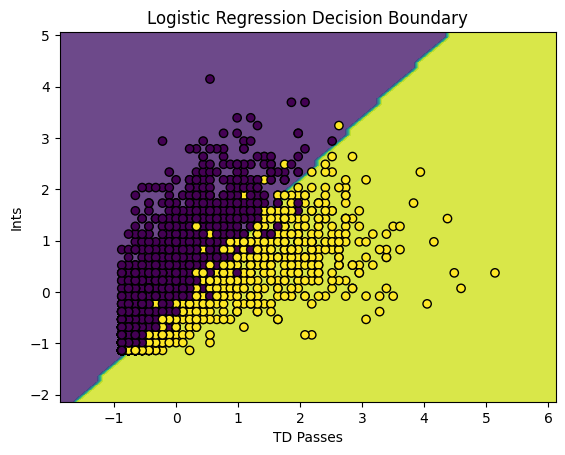

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score

#Selecting features and target variable
X = final_df[['TD Passes', 'Ints']]
y = pd.cut(final_df['Passer Rating'], bins=2, labels=[0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating and training the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

#Making predictions on the test set
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"R-squared: {r_squared}")
print(classification_report(y_test, y_pred))

#Creating a meshgrid of points to plot the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#Predicting the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plotting the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
plt.xlabel('TD Passes')
plt.ylabel('Ints')
plt.title('Logistic Regression Decision Boundary')
plt.show()

The Logistic Regression model demonstrates the relationship between touchdowns and interceptions as features to predict passer rating. Touchdowns are positively related with a better performance and a higher passer rating. While interceptions are negatively associated with a lower passer rating. The model displays this relationship and creates a decision boundary to classify passer based on their predicted passer rating.

**5. Support Vector Machine (SVM) Classifier**

**SVM with Linear Kernel**

In [ ]:
from sklearn.svm import SVC
from sklearn import svm, datasets

#Obtaining linear kernel and training model
svm_clf = SVC(C=1, kernel='linear')
svm_clf.fit(X_train, y_train)

#Test set predictions
y_hat = svm_clf.predict(X_test)

print('Accuracy of: ', accuracy_score(y_test, y_hat))

Accuracy of:  0.8789473684210526


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


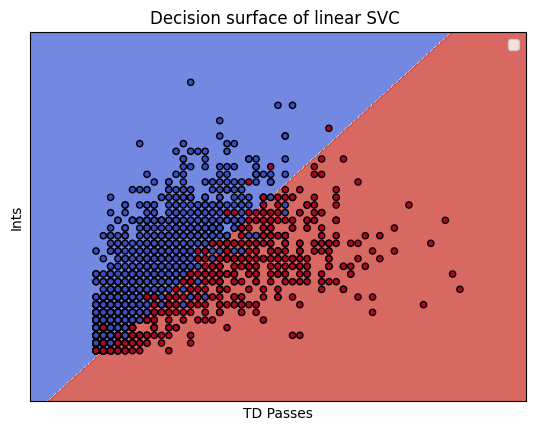

In [ ]:
#Deciding features
X = X_train.iloc[:, :2].values

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

title = ('Decision surface of linear SVC ')

#Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, svm_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Ints')
ax.set_xlabel('TD Passes')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

The SVM with a linear kernel achieves an accuracy of around 0.87 (with a C value of 1) in predicting passer rating. The lower accuracy of 0.87 suggests that this may not be the best choice for seperating passers. The linear decision boundary indicates that the relationship between touchdowns, interceptions, and passer rating is relatively linear and separable. The SVM model is able to classify quarterbacks based on these two features using a simple straight line as the decision boundary.

**SVM with Polynomial Kernel**

In [ ]:
#Create an object with polynomial kernel
svm_clf = SVC(C=1, kernel='poly')
svm_clf.fit(X_train, y_train)

y_hat = svm_clf.predict(X_test)

#Evaluate the model's accuracy
print('Accuracy of: ', accuracy_score(y_test, y_hat))

Accuracy of:  0.8736842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


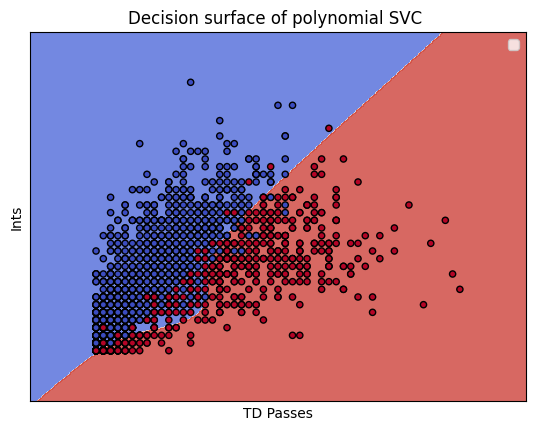

In [ ]:
X = X_train.iloc[:, :2].values
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

title = ('Decision surface of polynomial SVC ')

#Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#Visualization
fig, ax = plt.subplots()
plot_contours(ax, svm_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Ints')
ax.set_xlabel('TD Passes')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

The SVM with a polynomial kernel, using C value of 1, acheives an accuracy of about 0.87, very similar to the linear kernel. Which may not be the best in seperating the passer rating category. The decision boundary has a slightly curved shape compared to the linear kernel which can help capture any non-linear relationships between the features and passser rating. Ultimately while the polynomial kernel tries to find a curve to determine the two categories it is not a substantial improvement over the linear kernel.

**SVM with RBF Kernel**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


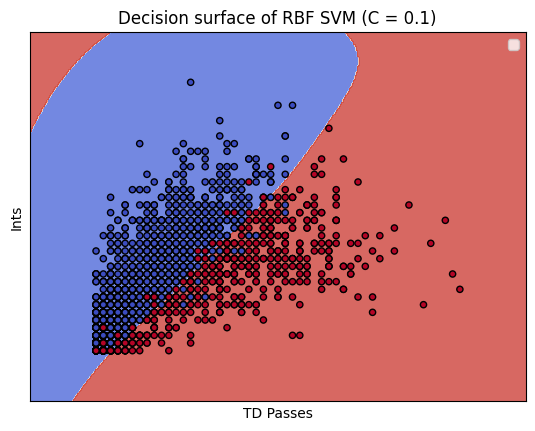

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


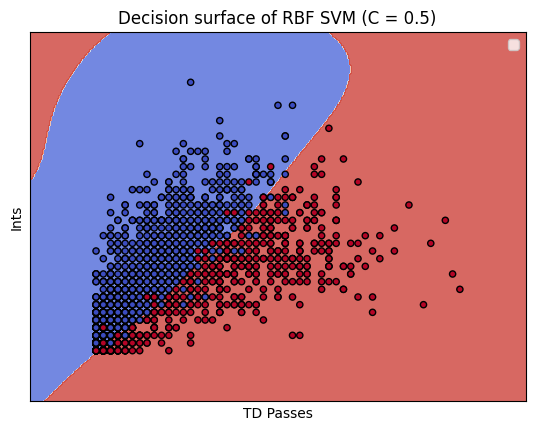

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


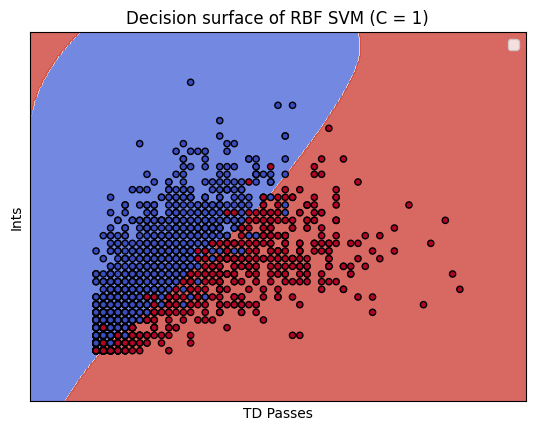

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


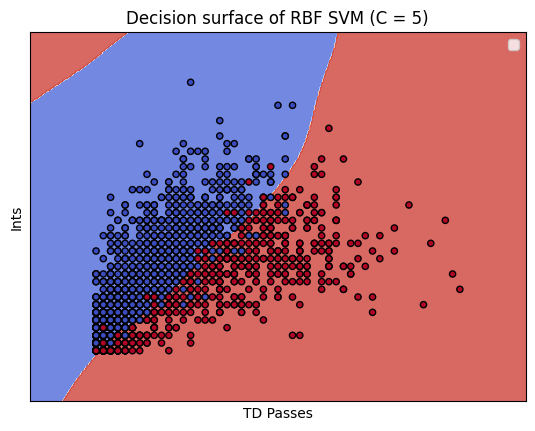

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


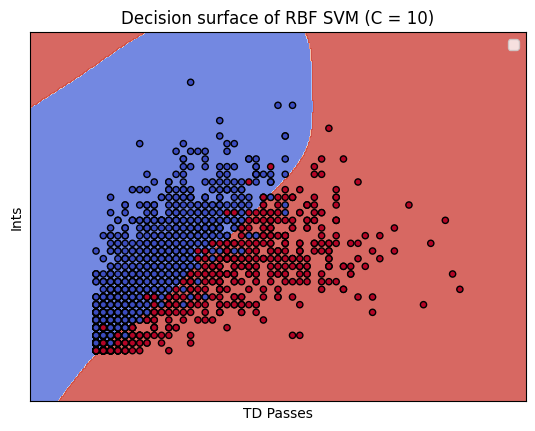

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


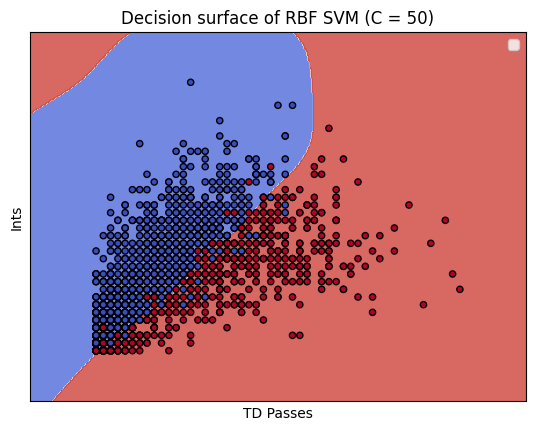

C = 0.1, Accuracy = 0.8649122807017544
C = 0.5, Accuracy = 0.9070175438596492
C = 1, Accuracy = 0.9052631578947369
C = 5, Accuracy = 0.9
C = 10, Accuracy = 0.9035087719298246
C = 50, Accuracy = 0.9017543859649123

Best C value: 0.5, Accuracy: 0.9070175438596492


In [ ]:
#Define C values to fine tune the model
C_values = [0.1, 0.5, 1, 5, 10, 50]

#Create lists to store results
accuracies = []
models = []

#Iterate through C values
for C in C_values:

    #Creating SVM model with RBF kernel
    svm_clf = SVC(C=C, kernel='rbf')
    svm_clf.fit(X_train, y_train)
    models.append(svm_clf)

    #Make predictions on test set
    y_hat = svm_clf.predict(X_test)

    #Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_hat)
    accuracies.append(accuracy)

    X = X_train.iloc[:, :2].values

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    #Plot information
    title = (f'Decision surface of RBF SVM (C = {C})')
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    fig, ax = plt.subplots()
    plot_contours(ax, svm_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('Ints')
    ax.set_xlabel('TD Passes')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

for i, C in enumerate(C_values):
    print(f"C = {C}, Accuracy = {accuracies[i]}")

#Select best C value based on accuracy
best_C_index = np.argmax(accuracies)
best_C = C_values[best_C_index]
print(f"\nBest C value: {best_C}, Accuracy: {accuracies[best_C_index]}")

Using the RBF Kernel, with C=1, it provides better accuracy compared to the linear and polynomial kernels with C=1 for this specific task. This suggests that the RBF kernel's ability to model non-linearity is beneficial for capturing the relationships in the data and achieving better classification performance. Since the distribution of data points is better suited with the non-linear decsion boundary.

Due to these factors the RBF Kernel performed the best compared to other kernels and even when compared to logistic regression. Logistic regression achieved a accuracy of around 0.87 which is similar to the linear and polynomial kernel. The reason RBF performed better as opposed to logistic regression is beacuse RBF is more suited for non-linear relationships unlike logistic regression which uses a linear decision boundary.

Fine tuning the C parameter will control the trade-offs between complexity and margin width lower C values result in wider margins which will cause generalization which may lead to more misclassifications. In this scenario though the C value of 0.5 lead to the best performing model with an accuracy of 0.907. Comparing that to the other C values they are all very similar and around 0.9 accuracy but when you go to low (e.g. 0.1) the accuracy begins to dip below 0.9.